# Traitement des codes qualité

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
xr_ds = xr.open_dataset("data/GL_TS_MO_62450.nc")

## Représentation en couleurs des codes qualité

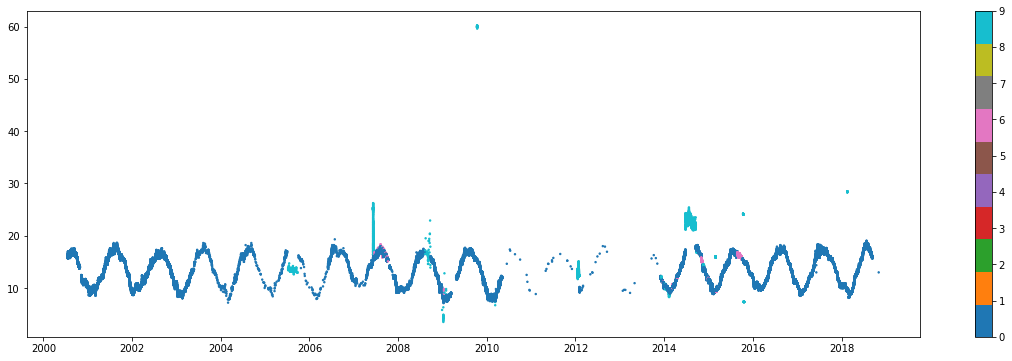

In [6]:
fig, ax = plt.subplots(figsize=(20,6))

# Création de la légende
cmap = matplotlib.cm.get_cmap('tab10')
normalize = matplotlib.colors.Normalize(vmin=0, vmax=9)
cax, _ = matplotlib.colorbar.make_axes(ax)
cbar = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap, norm=normalize)

# Extraction des valeurs à tracer
x = xr_ds.TIME.values       # Temps
y = xr_ds.TEMP[:,0].values  # Températures
quality_codes = xr_ds.TEMP_QC[:,0].values   # Codes qualité

# L'argument `c` reçoit un tableau de valeurs qui vont servir à établier
# la couleur de chaque point
ax.scatter(x, y, c=quality_codes, s=2, cmap=cmap);

## Filtrage de valeurs par codes qualité

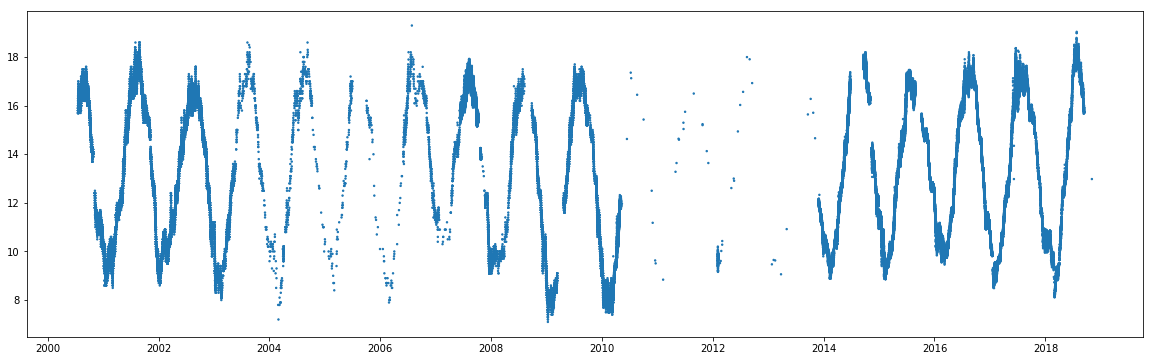

In [7]:
expected_quality_codes = [1, 2]
temp_quality_code = xr_ds.TEMP_QC[:,0]

# Établir un masque de filtrage basé sur les codes qualité attendus
mask = temp_quality_code.isin(expected_quality_codes)

# Filtrage de chaque série de valeurs à l'aide de ce masque
x = xr_ds.TIME[mask].values
y = xr_ds.TEMP[mask,0].values
color = temp_quality_code[mask].values

# Tracer du graphique
fig, ax = plt.subplots(figsize=(20,6))
ax.scatter(x, y, c=color, s=2, cmap=cmap);